In [172]:

#Using data in file 'data/world_bank_projects.json' do the following:
#Find the 10 countries with most projects
#Find the top 10 major project themes (using column 'mjtheme_namecode')
#In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [173]:
%matplotlib inline
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize


In [174]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [175]:
# Reading data from JSON file >> forming data frame
wbDF = pd.read_json('data/world_bank_projects.json')
wbDF.head(2)

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


In [176]:
# Defining top 10 countries with the most amount of projects
tc = wbDF.countryshortname.value_counts().head(10)
tc

Indonesia             19
China                 19
Vietnam               17
India                 16
Yemen, Republic of    13
Morocco               12
Bangladesh            12
Nepal                 12
Mozambique            11
Africa                11
Name: countryshortname, dtype: int64

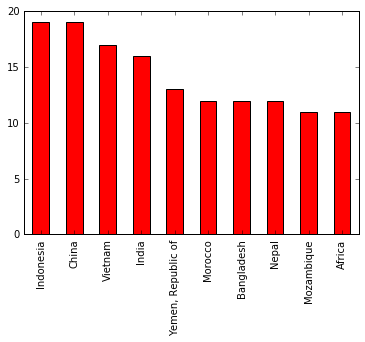

In [177]:
tc.plot(kind = 'bar', color = 'red')

In [178]:
wbdString = json.load(open('data/world_bank_projects.json'))
wbdNorm = json_normalize(wbdString, 'mjtheme_namecode')
wbdNorm.head()

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


In [179]:
# Each theme code corresponds to the particular theme, however due to missing data in project names column top project themes
# count gives inaccurate results ==> code : 11 -> count 250 ; theme: Environment and natural resources management -> count 223 
wbdNorm.code.value_counts().head()

11    250
10    216
8     210
2     199
6     168
Name: code, dtype: int64

In [180]:
wbdNorm.name.value_counts().head()

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Name: name, dtype: int64

In [181]:
# getting rid of missing values in the data frame and grouping all available themes upon code basis
wbdName = wbdNorm[wbdNorm.name != '']
cnMatch = wbdName.name.groupby(wbdName.code)
# listing content of code groups
list(cnMatch)

[('1', 2       Economic management
  88      Economic management
  175     Economic management
  204     Economic management
  205     Economic management
  220     Economic management
  222     Economic management
  223     Economic management
  249     Economic management
  357     Economic management
  453     Economic management
  454     Economic management
  458     Economic management
  497     Economic management
  647     Economic management
  648     Economic management
  784     Economic management
  803     Economic management
  841     Economic management
  900     Economic management
  1010    Economic management
  1045    Economic management
  1056    Economic management
  1057    Economic management
  1078    Economic management
  1206    Economic management
  1212    Economic management
  1218    Economic management
  1229    Economic management
  1230    Economic management
  1235    Economic management
  1257    Economic management
  1260    Economic management
  Nam

In [182]:
# As all groups contain identical strings (each for each group) we can pick one string for each group
cnMatch = cnMatch.max()
cnMatch

code
1                              Economic management
10                               Rural development
11    Environment and natural resources management
2                         Public sector governance
3                                      Rule of law
4         Financial and private sector development
5                            Trade and integration
6            Social protection and risk management
7                      Social dev/gender/inclusion
8                                Human development
9                                Urban development
Name: name, dtype: object

In [183]:
# Now lets put everything into the dictionary:
cnMatch = cnMatch.to_dict()
cnMatch

{'1': 'Economic management',
 '10': 'Rural development',
 '11': 'Environment and natural resources management',
 '2': 'Public sector governance',
 '3': 'Rule of law',
 '4': 'Financial and private sector development',
 '5': 'Trade and integration',
 '6': 'Social protection and risk management',
 '7': 'Social dev/gender/inclusion',
 '8': 'Human development',
 '9': 'Urban development'}

In [189]:
# Applying map function to 2 series keys of one series are mapping with values of another series
matched_names = wbdNorm.code.map(cnMatch) 
matched_names.head()

0                               Human development
1    Environment and natural resources management
2                             Economic management
3           Social protection and risk management
4                           Trade and integration
Name: code, dtype: object

In [192]:
# replacing name column in the initial data frame with the column which has missing data filled in
wbdNorm.name = matched_names
wbdNorm.head()

,code,name
0,8,Human development
1,11,Environment and natural resources management
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


In [199]:
# Finding top 10 popular project topics rightaway
tth = wbdNorm.name.value_counts().head(10)
tth

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: name, dtype: int64

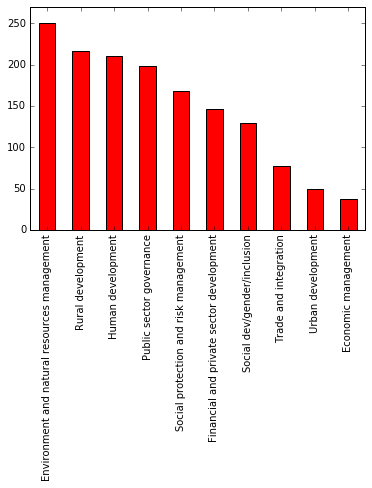

In [201]:
tth.plot(ylim = (0,270),kind = 'bar', color = 'red')